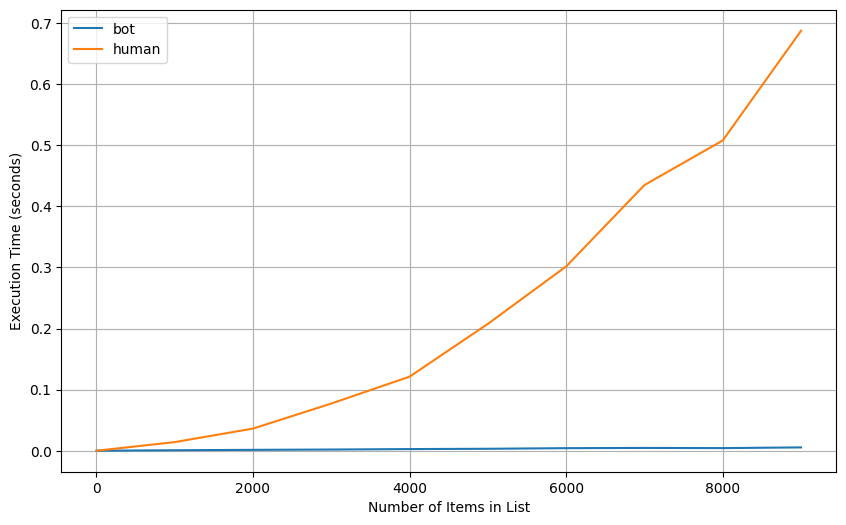

In [11]:
import matplotlib.pyplot as plt
import time
import random

# Define the two flatten functions
def flatten1(lst):
    if not isinstance(lst, list):
        return lst
    else:
        result = []
        for i in lst:
            if isinstance(i, list):
                result += flatten1(i)
            else:
                result.append(i)
        return result

def flatten2(lst: list) -> list:
    if isinstance(lst, list):
        check_lst = lst[:]
        for i, item in enumerate(lst):
            if isinstance(item, list):
                i = i + len(lst) - len(check_lst)
                if not flatten2(item):
                    lst = lst[:i] + lst[i+1:]
                else:
                    lst = lst[:i] + flatten2(item) + lst[i+1:]
    return lst

# Initialize lists to store the number of items and the execution times
num_items = []
times1 = []
times2 = []

# Generate nested lists with different sizes and measure the execution times
for i in range(1, 10001, 1000):
    lst = [[[[random.randint(1, 10)]]] for _ in range(i)]
    num_items.append(i)

    start = time.time()
    flatten1(lst)
    end = time.time()
    times1.append(end - start)

    start = time.time()
    flatten2(lst)
    end = time.time()
    times2.append(end - start)

# Plot the execution times
plt.figure(figsize=(10, 6))
plt.plot(num_items, times1, label='bot')
plt.plot(num_items, times2, label='human')
plt.xlabel('Number of Items in List')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

